# M231 Numerical Analysis

## Coursework (worth 20% of overall module mark)


### Instructions

- Answer all questions.
- There are 100 marks available.
- You can work in small groups (maximum size of 3). You are not required to work with others if you prefer to work alone. Please avoid discussing the coursework with others outside your chosen group. All submissions will be checked for plagiarism (including collusion with other groups). If you choose to work in a group, every group member must contribute to the work.
- Aim to make your code clear and well commented.
- Create additional markdown cells as needed to add brief explanations of your working.
- Full marks will be given for working code that is as efficient as possible (think about function evaluations!).

One group member needs to upload your edited version of this notebook to the Moodle dropbox by 11pm on Friday 6th December. Your notebook should be submitted as a file named

'M231_CW_xxxxxx.ipynb'

where `xxxxxx` is replaced by the 6-digit student number of the group member uploading the coursework.  Marks will be lost if you do not name this file correctly.

Please include the student numbers of all those in your group in the cell below (double click to edit):

**Group Members** (student numbers only): Individual Work 




### <font color="red">Please press Shift+Enter to evaluate code cells and format markdown cells (if necessary). </font>

# Part 1 (20 marks)

Let us consider an alternative method to find roots of a function $f$ in an interval $[a, b]$ similar to the bisection method.

Assuming that $f(a)f(b) < 0$, this method determines a new point $x_m$ as the intersection of the straight line connecting $(a, f(a))$ and $(b, f(b))$ with the $x$-axis:

$$ x_m=\frac{f(a)b-f(b)a}{f(a)-f(b)}.$$

How it continues depends on the sign of $f(x_m)$:

Case (a): $f(x_m)$ has the same sign as $f(a)$: in this case the new
lower bound $a$ is $x_m$ and $b$ stays the same.

Case (b): $f(x_m)$ has the same sign as $f(b)$: in this case the new upper bound $b$ is $x_m$ and $a$ stays the same.

Case (0): $f(x_m)=0$: $x_m$ is a root, stop and return $x_m$

Write a function to implemement this method. An outline is provided below, the inputs are as follows:

$f:$ a function of a single variable.  	

$a:$ initial lower bound for the root of $f$;
 
$b:$ initial upper bound for the root of $f$; the root of $f$ is to be found between $a$ and $b$;
 
$N:$ (a positive integer): the iteration should stop as soon as the number of iterations reaches $N$;
 
tol: tolerance; the iteration should stop if $|f(x_m)|<tol$ where tol is a small positive number.


Your code should __return__ four outputs:
- the most recent value of $x_m$ (first output)
- the total number of iterations (second output)
- how many times the left boundary and right boundary were updated respectively (third and fourth output). 

You should include statements to let the user know why the code is stopping, such as "max number of iterations reached" or "tolerance reached".


In [1]:
def findroot(f,a,b,N,tol):
    lbound=0 #counter for left boundary
    rbound=0 #counter for right boundary
    if f(a)*f(b)>=0: #based on assumption that f(a) and f(b) have different signs and a or b is not a root.
        return False
    for k in range(N): # 0 to (N-1) iterations, as we want an output (xm) of kth iteration
        xm=(f(a)*b-f(b)*a)/(f(a)-f(b)) 
        if abs(f(xm))<tol: # tolerance reached
            print ('tolerance reached')
            break # breaking loop
        elif f(xm)*f(a)>0:# f(xm) and f(a) have same signs 
            a=xm #new a
            lbound+=1 #a changed, counter updated by 1   
        elif f(xm)*f(b)>0:
            b=xm
            rbound+=1
        else: #f(xm)==0,  case when tolerance is 10^(-15)(Python rounding) and the number of iterations is sufficiently high 
            print ('f(xm) is approx. zero, correct to 15 decimal places')
            break  
    if k==N-1:#  number of iteration reached 
        xm=(f(a)*b-f(b)*a)/(f(a)-f(b)) # calculates output of last iteration
        k+=1 #Within the loop, the input for every iteration(new a or b) was calculated N times, but the output only N-1 times, we need to update k 
        print ('max number of iteration reached')
    return xm, k, lbound, rbound

# Part 2 (10 marks)

The function

$$f(x)=x^4+3x^2+2^x-4.$$

has a root in the interval $[0,2]$. 

**(a)** Define this function and then call your __findroot__ function above to approximate this root. You may use $tol = 10^{-10}$ and $N = 100$. (**6 marks**) 

**(b)** Comment briefly on the output. (**4marks**)


In [2]:
def f(x):
    return x**4+3*x**2+2**x-4
findroot(f,0,2,100,10**(-10))

tolerance reached


(0.7911522700872781, 60, 60, 0)

**Answer part 2(b) :** The function has returned an approximated value of the root $0.7911522700872781$. It took **60 iterations** to approximate root within specified tolerance for f(xm). Only the left boundary was updated **(60 times)**. The derivative of f is $4x^3+6x+2^xln(2)$ which is positive, meaning that the function is increasing, so there is only one real root on the given interval.

# Part 3 Graphs (15 marks)

**(a)** (**5 marks**)
Define a function __function_graph__ so that it has 4 inputs:
- g, a function with one numerical input that returns a numerical output.
- a, a numerical variable, either int or float.
- b, a numerical variable, either int or float.
- n, an int. 

Your function should produce a graph of function $g$ on the interval $[a, b]$, use $n$ to produce the list of arguments of the function $g$, that is, $n$ equally spaced points from the interval $[a, b]$ that start with $a$ and end with $b$.

Use __function_graph__  to produce a graph of the function $f$ from Part 2 on the interval [0, 2].


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def function_graph(g,a,b,n):
    plt.title('Graph of f on the interval [0,2]') #title
    arguments = np.linspace(a,b,n) #defines the list of arguments applied to function, n equally spaced points from the interval [a,b]
    values = g(arguments) #set of values evaluated at every argument for given function
    plt.plot(arguments,values,label = 'f(x)') # plots graph of arguments against values, adds label
    plt.legend() # shows legend
    plt.show()

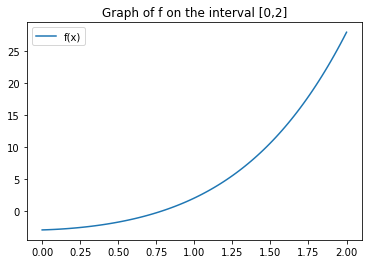

In [4]:
function_graph(f,0,2,100)

**(b)** (**10 marks**) Copy your function __findroot__ below and adapt it to collect and return all the values of $a$ and $b$ that are obtained through the iterative process, see Case (a) and Case (b) in Part 1. 

Create a function __convergence_graph__ with three inputs
- list of all $a$-values obtained from the modified findroot function.
- list of all $b$-values obtained from the modified findroot function. 
- the root of the function $f$ from Part 2, obtained from the modified findroot function.

Your function should plot all values for $a$ and $b$ obtained from your modified findroot function together with the solution (root) to illustrate the convergence of the bounds (or one bound $a$ or $b$) to the desired solution (root). This should be a visual representation of your answer to Part 2(b). 


In [5]:
def findroot(f,a,b,N,tol):
    lbound=0 #counter for left boundary
    rbound=0 #counter for right boundary
    a_values = [a] #list for a-values, starting with a
    b_values = [b] #list for b-values, starting with b
    if f(a)*f(b)>=0: #based on assumption that f(a) and f(b) have different signs and a or b is not a root.
        return False
    for k in range (N): # 0 to (N-1) iterations, as we want an output (xm) of kth iteration
        xm=(f(a)*b-f(b)*a)/(f(a)-f(b)) 
        # now it calculates input for the first iteration, 2nd, 3rd and so on.
        if abs(f(xm))<tol: # tolerance reached
            print ('tolerance reached')
            break # breaking loop
        elif f(xm)*f(a)>0:# same signs 
            a=xm #new a
            lbound+=1 #a changed, counter updated by 1  
        elif f(xm)*f(b)>0:
            b=xm
            rbound+=1
        else: #f(xm)=0,  case when tolerance is 10^(-15)(Python rounding) and the number of iterations is sufficiently high 
            print ('f(xm) is approx. zero, correct to 15 decimal places')
            break
        a_values.append(a) #adds new 'a' to the list
        b_values.append(b)
    if k==N-1:#  number of iteration reached 
        xm=(f(a)*b-f(b)*a)/(f(a)-f(b))# calculates output of last iteration
        k=k+1 #Within the loop, the input for every iteration(new a or b) was calculated N times, but the output only N-1 times, we need to update k
        print ('max number of iteration reached')
    return xm, k, lbound, rbound, a_values, b_values

In [6]:
def convergence_graph(a_values,b_values,xm):
    plt.title('Convergence of the bounds')#title
    A=len(a_values) #length of the list, both lists have same length
    x_vals=np.arange(A)#sequence of A evenly spaced values from 0 to A-1, stored as an array object.
    root_line=[]              #
    for i in range (A):       # creates the list of root values, same length as a_values and b_values
        root_line.append(xm)  #
    plt.plot(x_vals,a_values,label='a convergence')# plots graph of a_values against x_vals
    plt.plot(x_vals,b_values,label='b convergence') 
    plt.plot(x_vals,root_line,'--',color='black',label='root')#plots black dashed root line
    plt.legend()
    plt.show()

tolerance reached


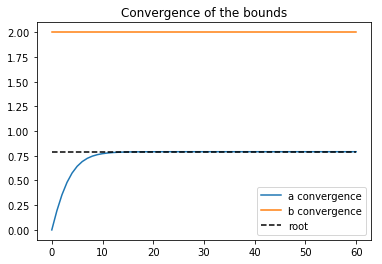

In [7]:
xm, k, lbound, rbound,a_values, b_values = findroot(f,0,2,100,10**(-10))
convergence_graph(a_values,b_values,xm)

# Part 4 (40 marks)

An improvement to this method can be obtained by following exactly the same procedure as above but modifying the equation for $x_m$ slightly:

$$
x_m = \frac{w_af(a)b-w_bf(b)a}{w_af(a)-w_bf(b)}
$$

where $w_a$ and $w_b$ are referred to as weights. Initially we set $w_a = w_b=1$, then in later stages they are set as follows:

- if the previous $k \geq 2$ iterations all were of Case (a) then $w_b = 2^{1-k}$ and $w_a = 1$
- if the previous $k \geq 2$ iterations all were of Case (b) then $w_a = 2^{1-k}$ and $w_b = 1$
- otherwise $w_a = w_b = 1$

So, for example, if you have moved up the lower boundary $a$  $k \geq 2$ times  in a row without changing the upper boundary $b$ then one downweighs the function value $f(b)$ by a factor of $\frac{1}{2^{k-1}}.$  


Write a function to implemement this method. An outline is provided below, the inputs are as in Part 1. 

As before, your code should __return__ six outputs:
- the most recent value of $x_m$ (first output)
- the total number of iterations (second output)
- how many times the left boundary and right boundary were updated respectively (third and fourth output)
- the paths taken by a and b.

You should include statements to let the user know why the code is stopping, such as "max number of iterations reached" or "tolerance reached".

In [8]:
def Modfindroot(f,a,b,N,tol):
    lbound=0 #counter for left boundary
    rbound=0 #counter for right boundary
    a_values = [a] #list for a-values, starting with a
    b_values = [b] #list for b-values, starting with b
    wa=1 
    wb=1
    a_counter=0 #counter of how many times 'a' was updated in a row 
    b_counter=0 #counter of how many times 'b' was updated in a row
    if f(a)*f(b)>=0: #based on assumption that f(a) and f(b) have different signs and a or b is not a root.
        return False
    for k in range(N): # 0 to (N-1) iterations, as we want an output (xm) of kth iteration
        xm=(wa*f(a)*b-wb*f(b)*a)/(wa*f(a)-wb*f(b))
        if abs(f(xm))<tol: # tolerance reached
            print ('tolerance reached')
            break # breaking loop
        elif f(xm)*f(a)>0:# same signs 
            a=xm #new a
            lbound+=1 # a changed, counter updated by 1
            b_counter=0 # resets b_counter, because 'a' was updated
            wa=1               
            a_counter+=1 # updates a_counter, adding 1
            wb=2**(1-a_counter) # lbound changed at least twice in a row(note:2^(1-1)=1)
        elif f(xm)*f(b)>0:
            b=xm
            rbound+=1            
            a_counter=0
            wb=1
            b_counter+=1
            wa=2**(1-b_counter)
        else: #f(xm)=0,  case when tolerance is 10^(-15)(Python rounding) and the number of iterations is sufficiently high 
            print ('f(xm) is approx. zero, correct to 15 decimal places')
            break
        a_values.append(a)#adds new 'a' to the list
        b_values.append(b)
    if k==N-1:#  number of iteration reached 
        xm=(wa*f(a)*b-wb*f(b)*a)/(wa*f(a)-wb*f(b))# calculates output of last iteration
        k+=1 #Within the loop, the input for every iteration(new a or b) was calculated N times, but the output only N-1 times, we need to update k
        print ('max number of iteration reached')
    return xm, k, lbound, rbound, a_values, b_values

# Part 5 (15 marks)

**(a)** **(4 marks)**

Call your new root finding function with $f$ as defined in Part 2 to print the root. 

In [9]:
xm, k, lbound, rbound, a_values, b_values = Modfindroot(f,0,2,100,10**(-10))
print(xm) 

tolerance reached
0.7911522700969118


Also, number of iterations ,and number of times left and right boundaries have been updated:

In [10]:
print(k, lbound, rbound)

8 6 2


**(b)** **(6 marks)**

Compare the output of these two root finding methods, that is, the methods from Part 1 and Part 4.

**Answer part (b)**  __Modfindroot__ returns a value that is very close to the value in __findroot__. In fact, they agree to 10 decimal places.  The output of modified method converges much quicker to the root within specified tolerance for $f(xm)$. Taking only 8 iterations, the former method takes 7 and a half times as many iterations as the modified version. Comparing the graphs of these two finding methods, output of __findroot__ is near the root after roughly 10 iterations, however 60 are required, the modified version is near the root after just 3 iterations. Also , in this case, while the __findroot__ has only adjusted the left boundary,  __Modfindroot__ has six left and two right adjustments. 

**(c)** **(5 marks)** 

Plot a convergence graph for the new method, that is, how the bounds $a$ and $b$ approach the root. Use __convergence_graph__ function from Part 3 (b).

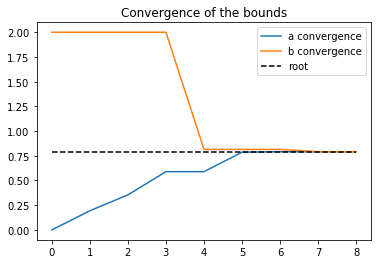

In [11]:
convergence_graph(a_values,b_values,xm)